In [1]:
# download on https://www.kaggle.com/datasets/chiragsaipanuganti/morph

In [2]:
import pandas as pd

from pathlib import Path

In [3]:
original_train_df = pd.read_csv('../datasets/morph/archive/Dataset/Index/Train.csv')
original_val_df = pd.read_csv('../datasets/morph/archive/Dataset/Index/Validation.csv')
original_test_df = pd.read_csv('../datasets/morph/archive/Dataset/Index/Test.csv')

original_df = pd.concat([original_train_df, original_val_df, original_test_df], ignore_index=True)
original_df.head()

,age,gender,filename,filepath
0,3,1,00013_00M19.JPG,/kaggle/input/morph/Dataset/Images/Train/00013...
1,3,1,00013_01M19.JPG,/kaggle/input/morph/Dataset/Images/Train/00013...
2,3,1,00013_02M19.JPG,/kaggle/input/morph/Dataset/Images/Train/00013...
3,3,1,00022_03M19.JPG,/kaggle/input/morph/Dataset/Images/Train/00022...
4,4,1,00022_04M20.JPG,/kaggle/input/morph/Dataset/Images/Train/00022...


<AxesSubplot:>

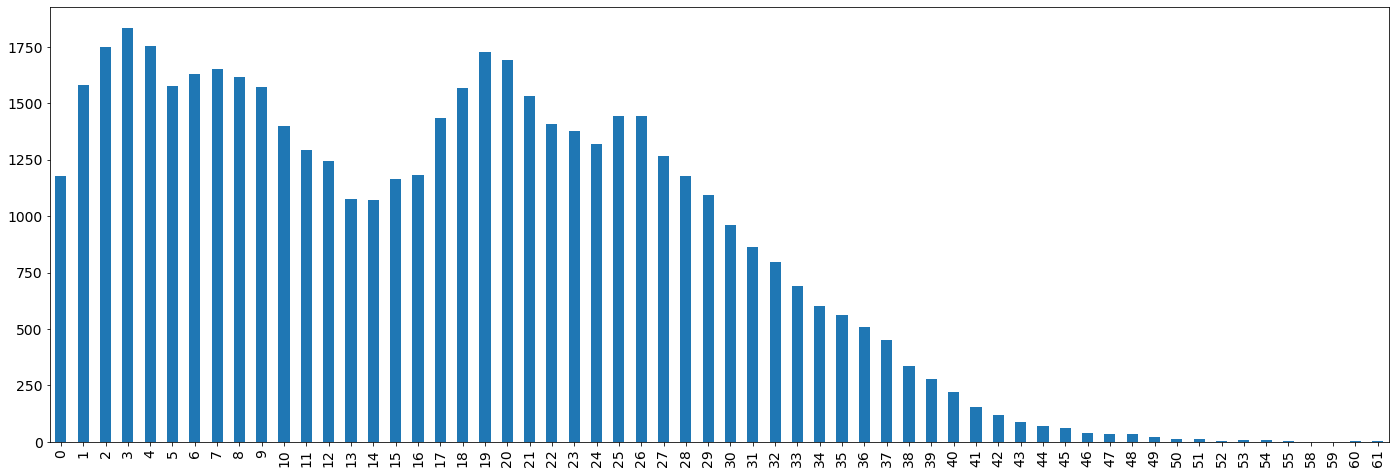

In [4]:
original_df['age'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(24,8))

In [5]:
total_cnt, minor_cnt = 0, 0

for age, count in original_df['age'].value_counts().items():
    if age < 18:
        minor_cnt += count
    total_cnt += count
    
minor_p = minor_cnt/total_cnt

print(f'Percentile of minors on "original" annotation: \t {minor_p * 100 : .4f}%')

Percentile of minors on "original" annotation: 	  51.9924%


In [6]:
def read_dataset(dataset_dir):
    current_path = Path('.')
    dataset_path = Path(dataset_dir)
    dataset = []
    for file in dataset_path.glob('**/*'):
        if file.is_file():
            if file.suffix not in ['.jpg','.JPG']:
                print(f'File with extension different than .jpg. File extension found: {file.suffix}')
            else:
                filename = file.stem
                photo_id, other_attributes = filename.split('_')

                if 'M' in other_attributes:
                    gender = 'M'
                    unknown_attribute, raw_age = other_attributes.split('M')
                elif 'F' in other_attributes:
                    gender = 'M'
                    unknown_attribute, raw_age = other_attributes.split('F')
                else:
                    print(f'Couldn\'t extract gender on file: {filename}')

                data = {
                    'photo_id': photo_id,
                    'age': int(raw_age),
                    'gender': gender,
                    'unknown_attribute': unknown_attribute,
                    'filepath': str(file.relative_to(current_path))
                }
                dataset.append(data)
    return dataset

In [7]:
dataset_data = read_dataset('../datasets/morph/archive/Dataset/Images')

In [8]:
df = pd.DataFrame(dataset_data)

df.head()

,photo_id,age,gender,unknown_attribute,filepath
0,00189,18,M,01,../datasets/morph/archive/Dataset/Images/Test/...
1,00242,19,M,06,../datasets/morph/archive/Dataset/Images/Test/...
2,00257,22,M,01,../datasets/morph/archive/Dataset/Images/Test/...
3,00425,20,M,03,../datasets/morph/archive/Dataset/Images/Test/...
4,00457,37,M,1,../datasets/morph/archive/Dataset/Images/Test/...


<AxesSubplot:>

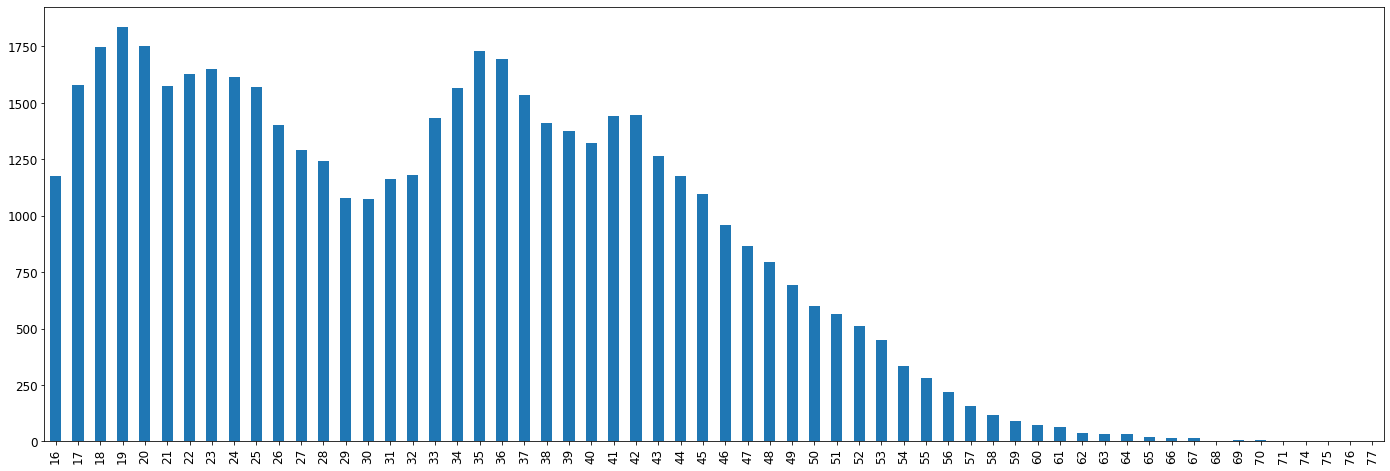

In [9]:
df['age'].value_counts().sort_index().plot(kind='bar', fontsize=12, figsize=(24,8))

In [10]:
total_cnt, minor_cnt = 0, 0

for age, count in df['age'].value_counts().items():
    if age < 18:
        minor_cnt += count
    total_cnt += count
    
minor_p = minor_cnt/total_cnt

print(f'Percentile of minors on extracted annotation: \t {minor_p * 100 : .2f}%')

Percentile of minors on extracted annotation: 	  5.51%
